In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("VEZC Startadministratie export.csv")
print(df.columns)

Index(['PILOTLOG_DATE', 'AF_DEP', 'AF_ARR', 'TIME_TOTAL', 'TIME_PIC',
       'TIME_INSTRUCTOR', 'TIME_DEP', 'TIME_ARR', 'AC_MODEL', 'AC_VARIANT',
       'AC_REG', 'PILOT1_NAME', 'PILOT2_NAME', 'GLIDERLAUNCH', 'REMARKS'],
      dtype='object')


In [6]:
df.describe()

,PILOTLOG_DATE
count,3.770000e+02
mean,2.017465e+07
std,3.743724e+04
min,1.970010e+07
25%,2.017040e+07
50%,2.017090e+07
75%,2.018101e+07
max,2.021100e+07


In [10]:
df_acmodel = df.groupby('AC_MODEL', as_index=True)['AF_DEP'].count().sort_values(ascending=False)
print(df_acmodel)

AC_MODEL
ASK 21                167
LS 4-b                122
SZD-51-1 Junior        52
Duo Discus             16
Discus CS               8
ASK 13                  7
Ka 4 Rhönlerche II      2
Nimbus 3DT              2
T.21B Sedbergh          1
Name: AF_DEP, dtype: int64


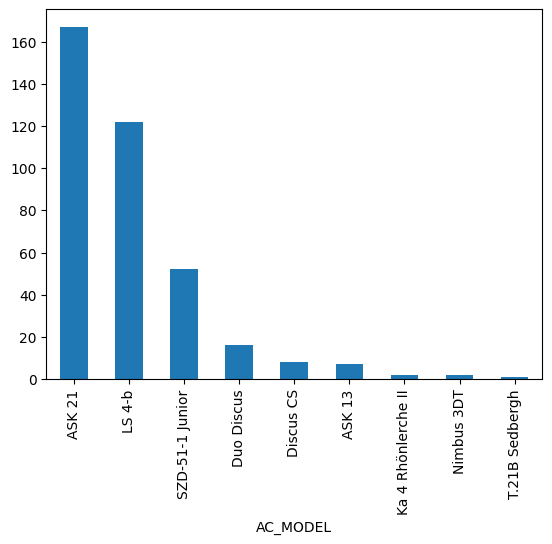

In [13]:
df_acmodel.plot(kind='bar')
plt.show()

In [15]:
df['TIME_TOTAL'] = pd.to_datetime(df['TIME_TOTAL'], format='%H:%M')

In [20]:
# Calculate the total hours flown
min_time = df['TIME_TOTAL'].min()
df['total_hours'] = (df['TIME_TOTAL'] - min_time).dt.total_seconds() / 3600

# Print the total hours flown
print(df['total_hours'])

0      0.633333
1      0.633333
2      1.766667
3      1.316667
4      0.066667
         ...   
372    0.450000
373    0.100000
374    0.933333
375    0.000000
376    0.000000
Name: total_hours, Length: 377, dtype: float64 ['AC_MODEL']


In [21]:
grouped_hours = df.groupby('AC_MODEL')['total_hours'].sum()
print(grouped_hours)


AC_MODEL
ASK 13                 2.500000
ASK 21                44.066667
Discus CS              4.150000
Duo Discus            18.616667
Ka 4 Rhönlerche II     0.816667
LS 4-b                51.833333
Nimbus 3DT            13.500000
SZD-51-1 Junior       24.100000
T.21B Sedbergh         0.083333
Name: total_hours, dtype: float64


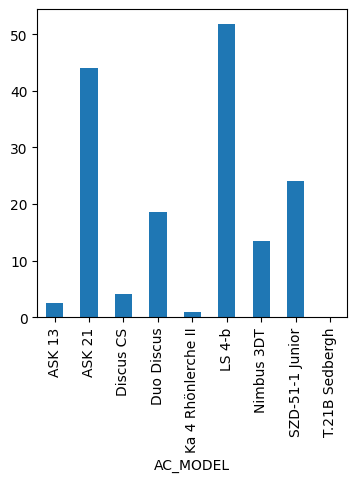

In [28]:
plt.figure(figsize=(4, 4))
grouped_hours.plot(kind='bar')
plt.show()